## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [13] : [MODEL SELECTION] </div>

#### <div align="center"> Semester Ganjil 2023/2024 </div>

In [70]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Steven Indriano"
myNIM = "57217"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Steven Indriano
NIM: 		57217
Start: 		2023-11-29 20:38:00.634912
Device ID: 	83814d41-8ebc-11ee-838c-f057a69a9c86



---

### Dataset yang dipakai:

1. [Nama dataset1] – sumber : [cantumkan link dataset]
2. [Nama dataset2] – sumber : [cantumkan link dataset]

### Hasil kerja

In [2]:
# Your codes are here (replace the following codes)
import time
time.sleep(10)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import os
import mglearn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression().fit(X_train, y_train)

print("Test set score: {:.2f}". format(logreg.score(X_test, y_test)))

Test set score: 0.88


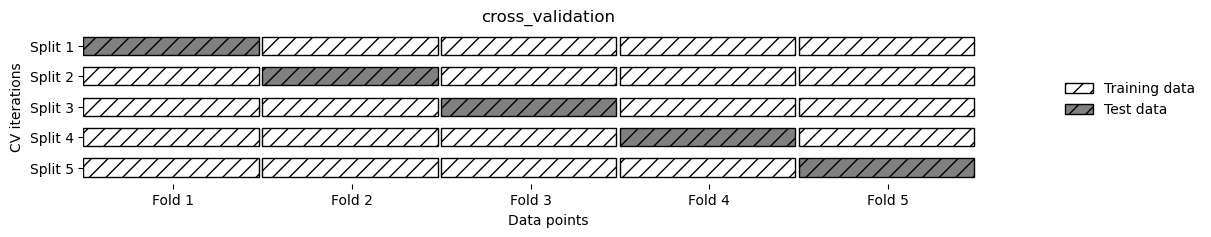

In [4]:
mglearn.plots.plot_cross_validation()

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [6]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [7]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


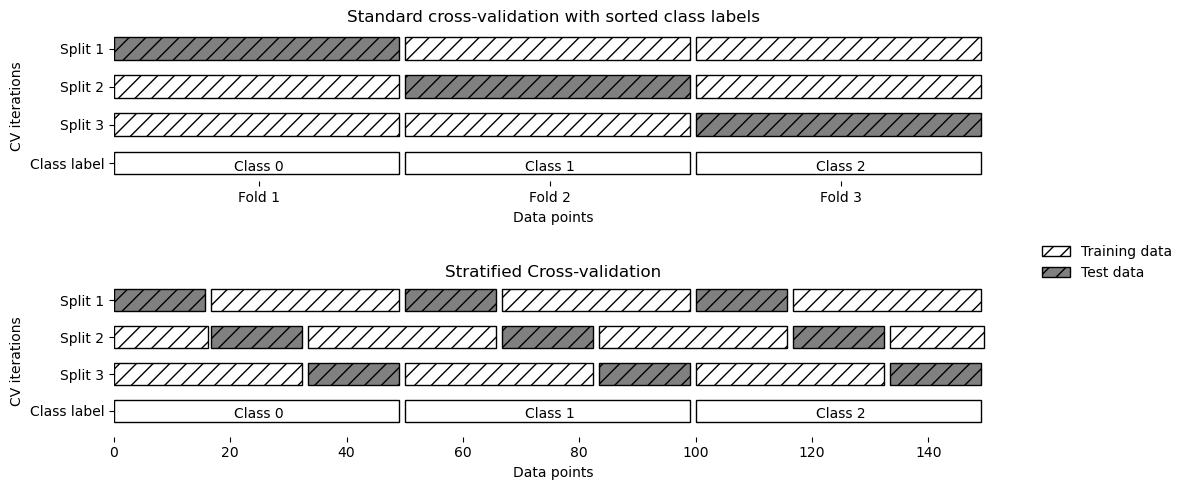

In [9]:
mglearn.plots.plot_stratified_cross_validation()

In [10]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [11]:
print("Cross-validaiton scores: \n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validaiton scores: 
[1.         1.         0.86666667 0.93333333 0.83333333]


In [12]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


In [14]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


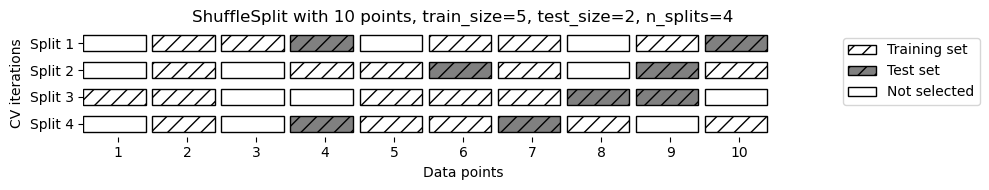

In [15]:
mglearn.plots.plot_shuffle_split()

In [16]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validaiton scores:\n{}".format(scores))

Cross-validaiton scores:
[0.98666667 0.97333333 0.98666667 0.97333333 0.94666667 1.
 0.96       0.94666667 0.96       0.97333333]


In [19]:
from sklearn.model_selection import GroupKFold
# x, y = make_blobs(n_samples=12, random_state=0)

# groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
# scores = cross_val_score(logreg, x, y, groups, cv=GroupKFold(n_splits=3))
# print("Cross-validation scores: \n{}".format(scores))
from sklearn.model_selection import GroupKFold
x, y = make_blobs(n_samples=12, random_state=0)
logreg = LogisticRegression()
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
cv = GroupKFold(n_splits=3)
scores = cross_val_score(logreg, x, y, groups=groups, cv=cv)
print("Cross-validation scores: \n{}".format(scores))

Cross-validation scores: 
[0.75       0.6        0.66666667]


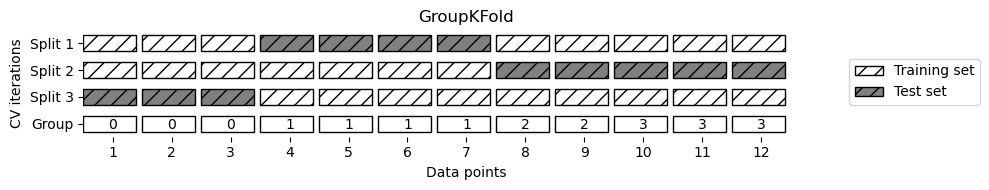

In [20]:
mglearn.plots.plot_group_kfold()

In [21]:
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {} size of test set: {}".format(
    x_train.shape[0], x_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(x_train, y_train)
        score = svm.score(x_test, y_test)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("Best scoreL {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112 size of test set: 38
Best scoreL 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


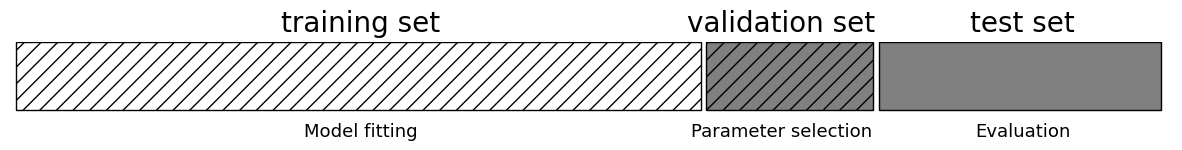

In [22]:
mglearn.plots.plot_threefold_split()

In [27]:
x_trainval, x_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_trainval, y_trainval, random_state=1)

print("Size of training set: {} size of validation set: {}  size of test set:"
     " {}\n".format(x_train.shape[0], x_valid.shape[0], x_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
        svm = SVC(gamma=gamma, C=C)
        svm.fit(x_train, y_train)
        score = svm.score(x_valid, y_valid)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(x_trainval, y_trainval)
test_score = svm.score(x_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: -", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84 size of validation set: 28  size of test set: 38

Best score on validation set: 0.96
Best parameters: - {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


In [35]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
        svm = SVC(gamma=gamma, C=C)
        
        scores = cross_val_score(svm, x_trainval, y_trainval, cv=5)
        
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(x_trainval, y_trainval)

SVC(C=10, gamma=0.1)

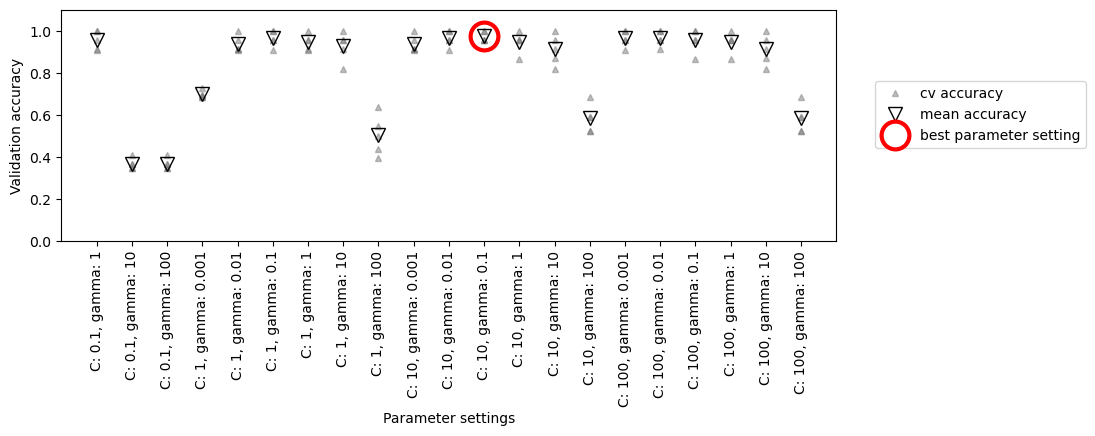

In [36]:
mglearn.plots.plot_cross_val_selection()

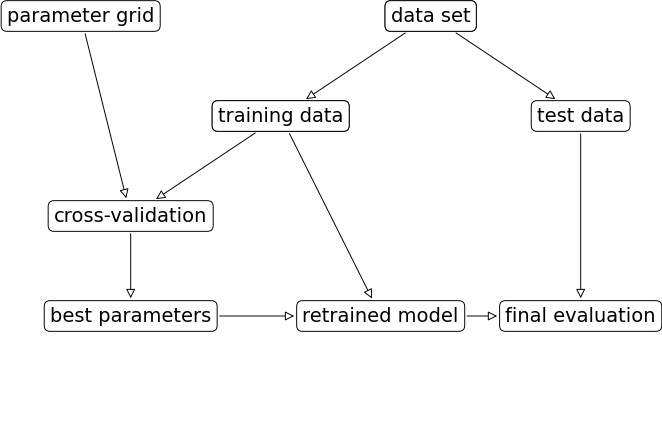

In [37]:
mglearn.plots.plot_grid_search_overview()

In [38]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [40]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score='True')

In [41]:
x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

In [42]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score='True')

In [43]:
print("Test set score: {:.2f}".format(grid_search.score(x_test, y_test)))

Test set score: 0.97


In [44]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [46]:
print("Best estimator: \n{}".format(grid_search.best_estimator_))

Best estimator: 
SVC(C=10, gamma=0.1)


In [47]:
results = pd.DataFrame(grid_search.cv_results_)

display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000600,0.000490,0.000642,0.000525,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.000927,0.000613,0.000261,0.000390,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.000501,0.000634,0.000231,0.000461,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.000513,0.000456,0.000200,0.000401,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.000518,0.000662,0.000200,0.000400,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


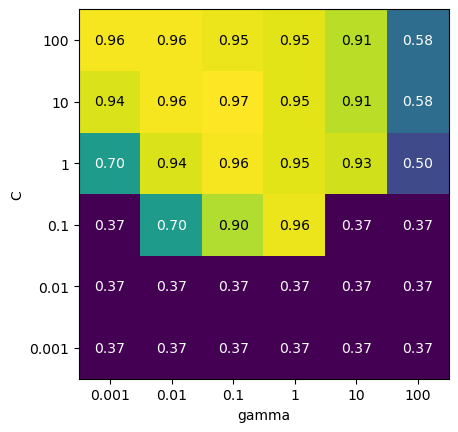

In [50]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                     ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

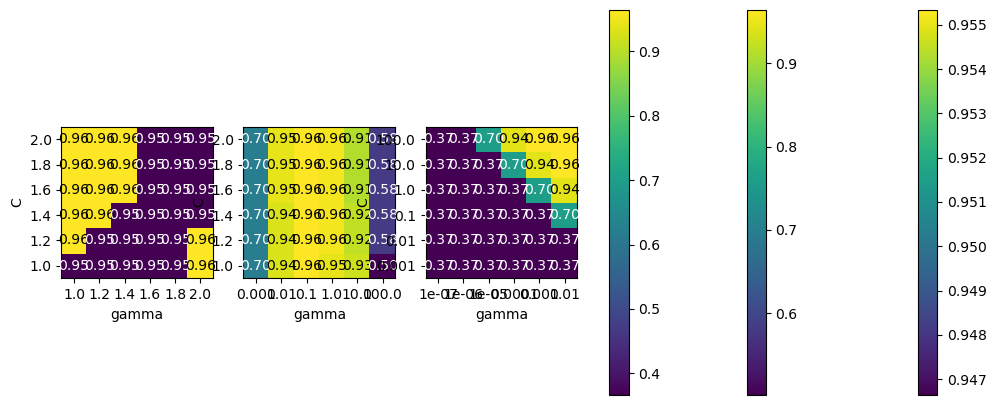

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                    'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
                    'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                          param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(x_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap='viridis', ax=ax)
    
    plt.colorbar(scores_image, ax=axes.tolist())

In [56]:
param_grid = [{'kernel': ['rbf'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
           {'kernel': ['linear'],
           'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids: \n{}".format(param_grid))

List of grids: 
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [57]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score='True')
grid_search.fit(x_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validaiton score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validaiton score: 0.97


In [58]:
results = pd.DataFrame(grid_search.cv_results_)

display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000409,0.000547,0.000422,0.000405,0.000564,0.0002,0.000919,0.001306,0.0,0.0,...,0.000022,0.0,0.001123,0.000901,0.0,0.001018,0.0,0.0,0.0,0.0
std_fit_time,0.000501,0.000456,0.000517,0.000497,0.000598,0.0004,0.001838,0.001946,0.0,0.0,...,0.000044,0.0,0.001745,0.001803,0.0,0.002036,0.0,0.0,0.0,0.0
mean_score_time,0.000404,0.000203,0.000706,0.000301,0.000193,0.0,0.0,0.0,0.0,0.000503,...,0.0,0.0,0.0,0.001001,0.0,0.0,0.001006,0.0,0.001006,0.0
std_score_time,0.000495,0.000405,0.000605,0.000602,0.000386,0.0,0.0,0.0,0.0,0.001005,...,0.0,0.0,0.0,0.002003,0.0,0.0,0.002012,0.0,0.002011,0.0
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


In [59]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                        iris.data, iris.target, cv=5)
print("Cross-validaiton scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validaiton scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


In [62]:
def nested_cv(x, y, inner_cv, Classifier, parameter_grid):
    outer_scores = []

    for training_samples, test_samples in outer_cv.split(x, y):
        best_params = {}
        best_score = -np.inf

        for parameters in parameter_grid:
            cv_scores = []

            for inner_train, inner_test in inner_cv.split(
                    x[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(x[inner_train], y[inner_train])
                score = clf.score(x[inner_test], y[inner_test])
                cv_scores.append(score)

            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters

        clf = Classifier(**best_params)
        clf.fit(x[training_samples], y[training_samples])

        outer_scores.append(clf.score(x[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [68]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))

print("Cross-validation scores: {}".format(scores))

TypeError: nested_cv() takes 5 positional arguments but 6 were given

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Simpulan perbandingan dataset
    - Hasil akurasi yang diberikan (jika ada dalam modul)
    - Hasil perbandingan akurasi antara algoritma (jika ada dalam modul)
    - Hasil pemikiran dan observasi akhir dari kerja menurut mahasiswa.

In [71]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Steven Indriano
NIM: 	57217
Time-stamp:	2023-11-29 20:38:06.320297


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [9]:
!jupyter nbconvert --to html "./IF540L_kelas_C_laporan_M13_57217_Steven Indriano.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./Template Laporan Tugas Mingguan Lab IF540.ipynb to html
[NbConvertApp] Writing 585987 bytes to Template Laporan Tugas Mingguan Lab IF540.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#